# Importing libraries and reading dataset

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = "ISO-8859-1")

C:\Users\lenovo\anaconda3\New folder\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [51]:
df.shape

(181691, 135)

In [52]:
df.isnull().any()

eventid       False
iyear         False
imonth        False
iday          False
approxdate     True
              ...  
INT_LOG       False
INT_IDEO      False
INT_MISC      False
INT_ANY       False
related        True
Length: 135, dtype: bool

In [53]:
name_lis = list(df.columns[df.isnull().any()])
name_lis

['approxdate',
 'resolution',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'location',
 'summary',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'nperps',
 'nperpcap',
 'claimed',
 'claimmode',
 'claimmode_txt',
 'claim2',
 'claimmode2',
 'claimmode2_txt',
 'claim3',
 'claimmode3',
 'claimmode3_txt',
 'compclaim',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',


In [54]:
null = dict()
for i in name_lis:
    percent_null = df[i].isnull().sum()/len(df[i])*100
    if percent_null >= 70:
        null[i]=percent_null

null

{'approxdate': 94.91499303762983,
 'resolution': 98.77814531264619,
 'alternative': 84.03278093026071,
 'alternative_txt': 84.03278093026071,
 'attacktype2': 96.52486914596761,
 'attacktype2_txt': 96.52486914596761,
 'attacktype3': 99.7644352224381,
 'attacktype3_txt': 99.7644352224381,
 'targtype2': 93.86650962348162,
 'targtype2_txt': 93.86650962348162,
 'targsubtype2': 94.11913633586694,
 'targsubtype2_txt': 94.11913633586694,
 'corp2': 94.43175501263134,
 'target2': 93.93475736277526,
 'natlty2': 94.04043128168153,
 'natlty2_txt': 94.04043128168153,
 'targtype3': 99.35274724669907,
 'targtype3_txt': 99.35274724669907,
 'targsubtype3': 99.39622766124904,
 'targsubtype3_txt': 99.39622766124904,
 'corp3': 99.4353049958446,
 'target3': 99.35329763169337,
 'natlty3': 99.36870841153387,
 'natlty3_txt': 99.36870841153387,
 'gsubname': 96.75823238355228,
 'gname2': 98.89207500646702,
 'gsubname2': 99.91193840091144,
 'gname3': 99.82167526184567,
 'gsubname3': 99.98899230011394,
 'motive': 

In [55]:
print(df.columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


### Chosing only relevent columns

In [56]:
df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df['Casualities'] = df.Killed + df.Wounded
df= df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type', 'Motive']]

df.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN


In [11]:
df['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

## Number of attacks in Years

Text(0, 0.5, 'Number of Attacks')

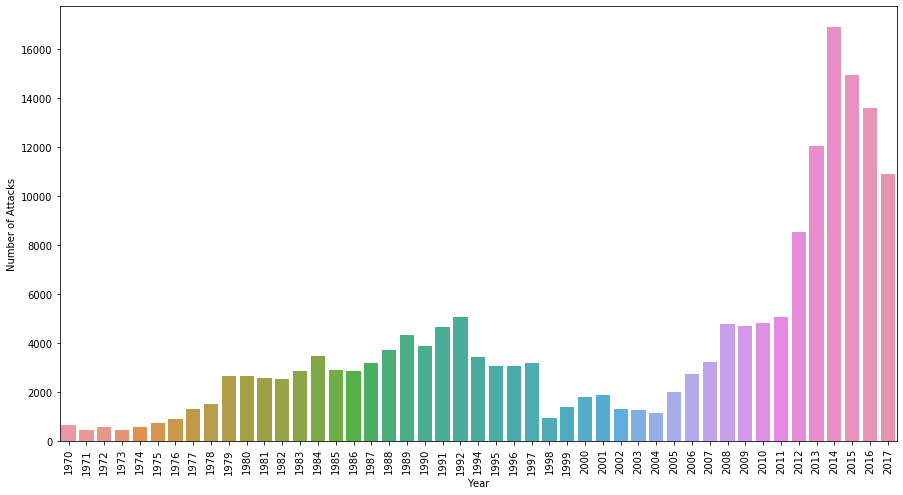

In [12]:
plt.figure(figsize=(15, 8))

sns.countplot(df['Year'])
plt.xticks(rotation = 90)
plt.ylabel("Number of Attacks")

### Number of attacks were maximum between 2012-2017(highest were in 2014)

In [13]:
len(df['Country'].unique())

205

#### There are 205 countries in dataset. Let's see only top 20 countries

In [59]:
df['Country'].value_counts()[:20]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

## Top 20 Countries affected by terrorism

Text(0, 0.5, 'Number of Attacks')

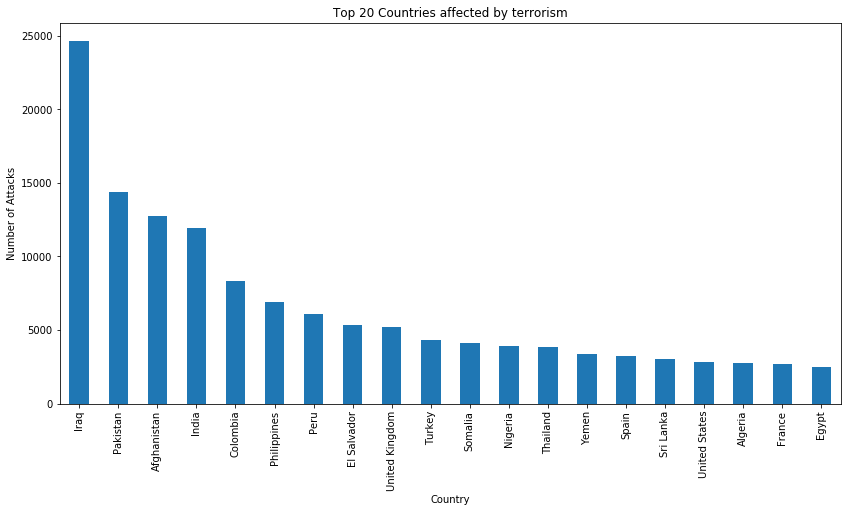

In [15]:
plt.figure(figsize=(14, 7))

df['Country'].value_counts()[:20].plot(kind = 'bar')
plt.title("Top 20 Countries affected by terrorism")
plt.xlabel("Country")
plt.ylabel("Number of Attacks")

### Iraq is the most affected country by terrorism followed by Pakistan. Afganistan and India

In [16]:
df['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

Text(0, 0.5, 'Number of Attacks')

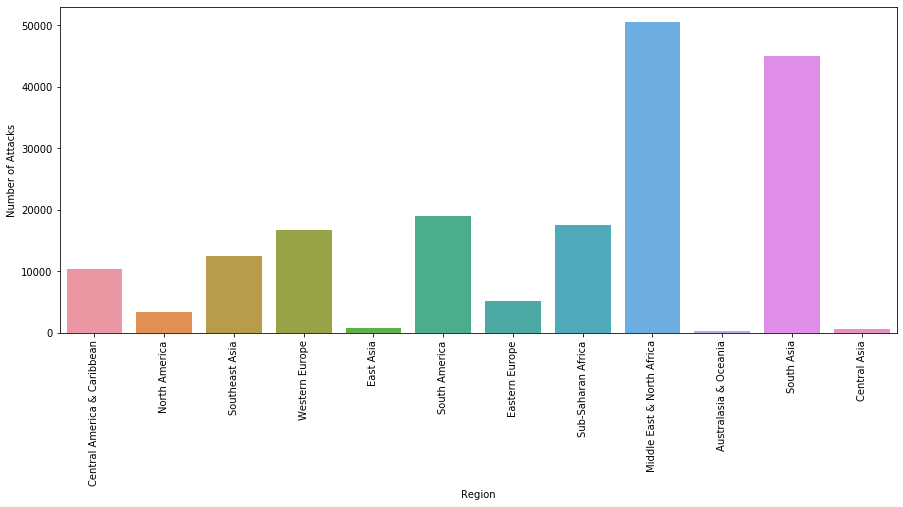

In [17]:
plt.figure(figsize=(15, 6))
sns.countplot(df['Region'])
plt.xticks(rotation = 90)
plt.ylabel("Number of Attacks")

### Middle East & north Africa and South Asia are the most affected region.

In [18]:
df['City'].value_counts()[:20]

Unknown           9775
Baghdad           7589
Karachi           2652
Lima              2359
Mosul             2265
Belfast           2171
Santiago          1621
Mogadishu         1581
San Salvador      1558
Istanbul          1048
Athens            1019
Bogota             984
Kirkuk             925
Beirut             918
Medellin           848
Benghazi           840
Peshawar           819
Quetta             803
Guatemala City     755
Baqubah            745
Name: City, dtype: int64

## Number of attacks by Groups

Text(0.5, 0, 'Number of attacks')

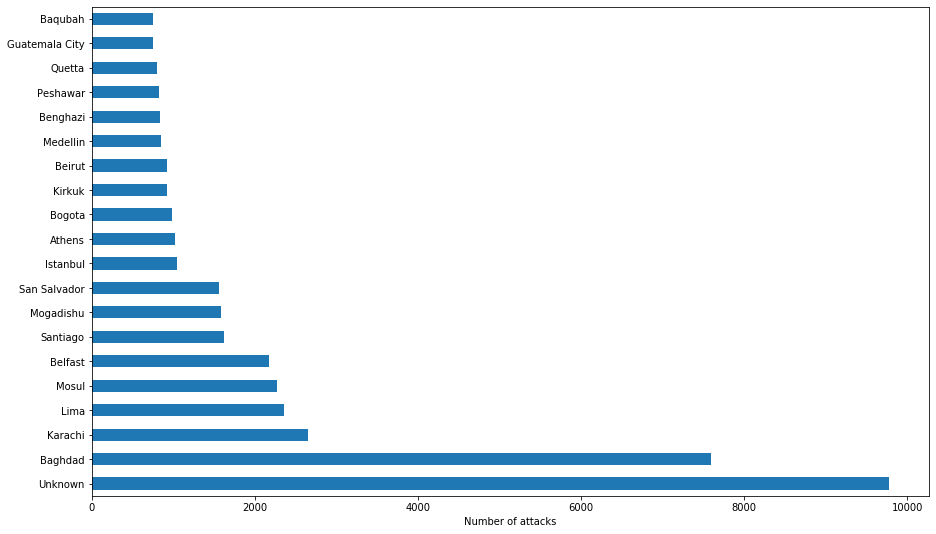

In [19]:
plt.figure(figsize=(15, 9))
df['City'].value_counts()[:20].plot(kind = 'barh')
plt.xlabel("Number of attacks")


### Majority of the attacks are from unknown groups.
### Baghdad and Karachi are at top after unknown groups.

In [20]:
df['AttackType'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

## Type of Attacks

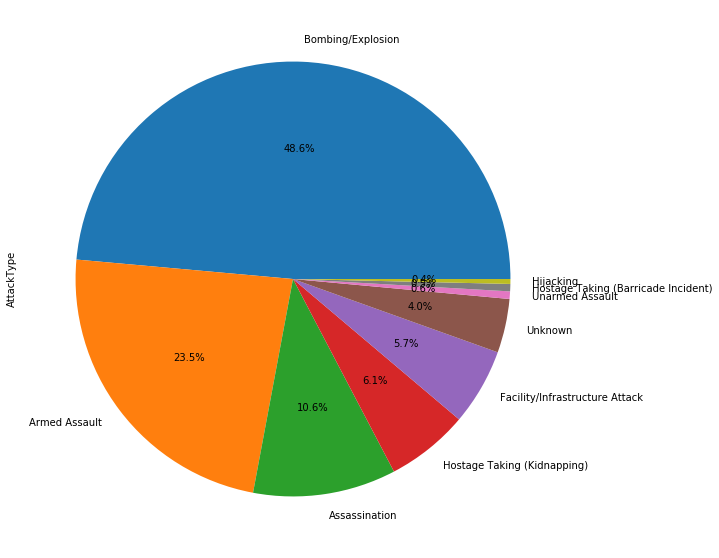

In [21]:
plt.figure(figsize=(10, 10))
df['AttackType'].value_counts().plot.pie(autopct = '%1.1f%%')

### Bombing and Army assault are most chosen attack types

In [22]:
sum(df['Killed'].dropna())

411868.0

In [23]:
sum(df['Wounded'].dropna())

523869.0

## Most affected Indian Cities

In [61]:
country_df = df[df['Country']=='India']
India = pd.DataFrame(country_df['City'].value_counts()[:20]).reset_index()
India = India.rename(columns = {'index' : 'City', 'City' : 'Attacks'})
india.head()

,City,Attacks
0,Srinagar,658
1,Unknown,624
2,Imphal,426
3,New Delhi,157
4,Amritsar,138


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

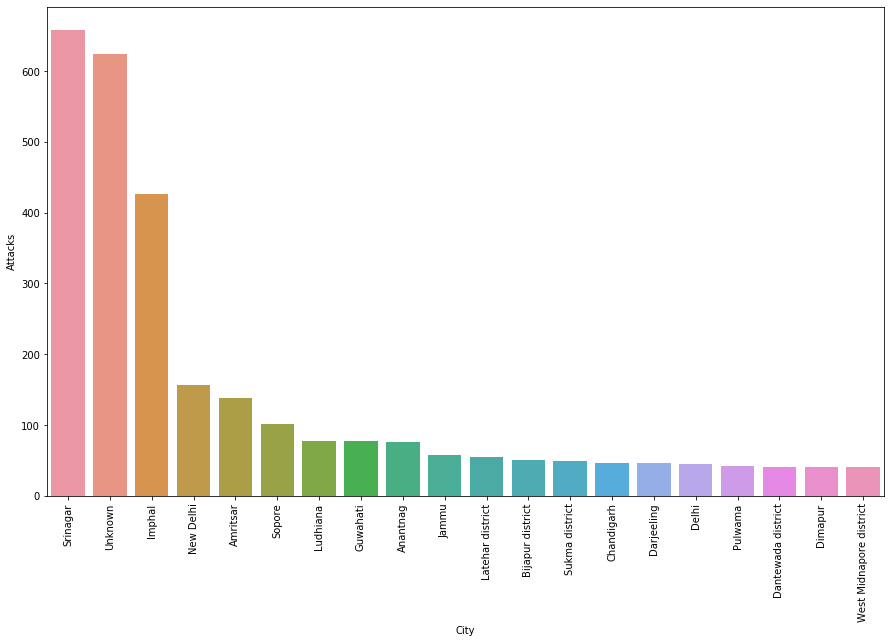

In [64]:
plt.figure(figsize=(15, 9))
sns.barplot(data = India, x = 'City', y = 'Attacks')
plt.xticks(rotation = 90)


###  Srinagar and Imphal are worst affected.

## Target of terrorists

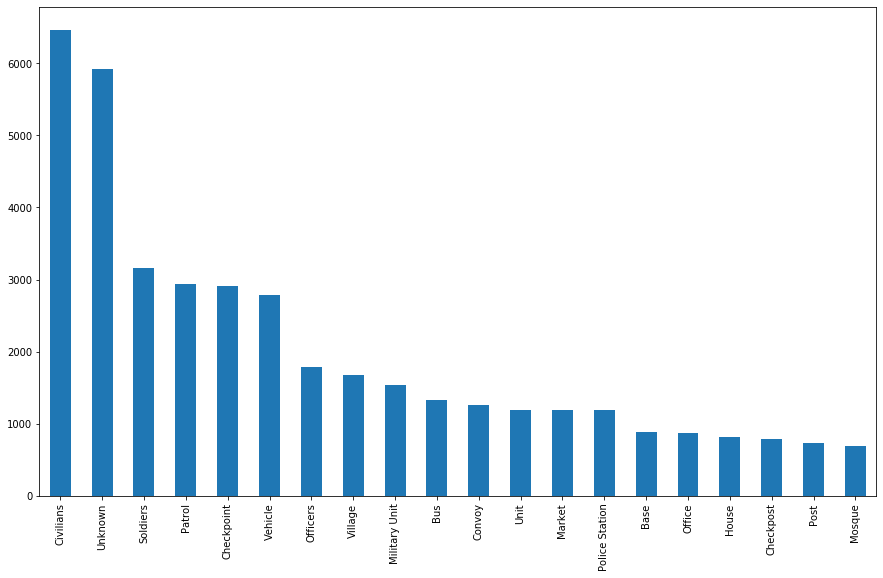

In [27]:
plt.figure(figsize=(15, 9))
df['Target'].value_counts()[:20].plot(kind  = 'bar')

### Civilians and Soliders are most targeted by terrorists

##  Target types

In [30]:
df['Target_type'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

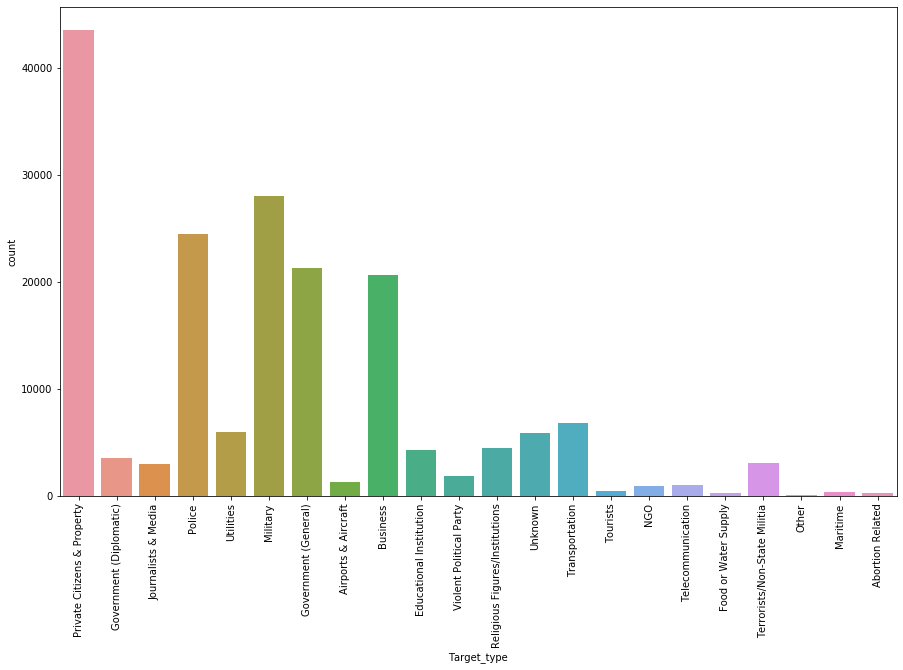

In [31]:
plt.figure(figsize=(15, 9))
sns.countplot(df['Target_type'])
plt.xticks(rotation = 90)


In [32]:
df['Weapon_type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

## Type of Weapon

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

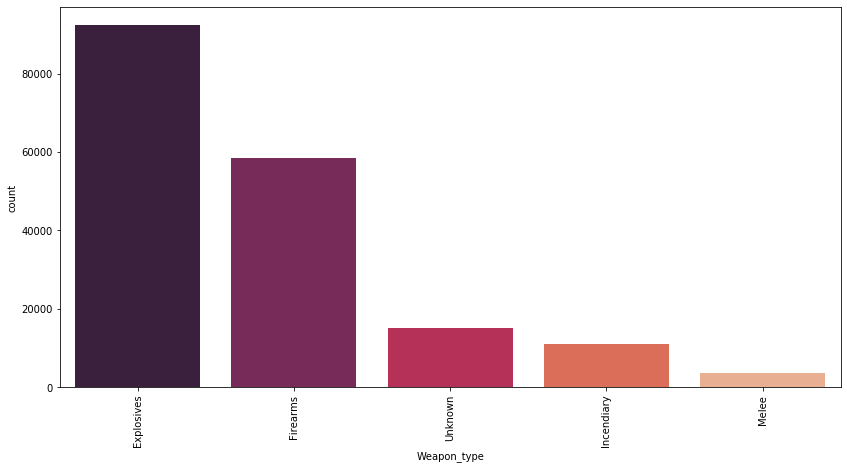

In [33]:
plt.figure(figsize=(14, 7))
sns.countplot(df['Weapon_type'],  palette="rocket",
              order=df['Weapon_type'].value_counts().iloc[:5].index)
plt.xticks(rotation = 90)

### Explosives and firearms are majorily responsible

In [34]:
Iraq = df[df['Country'] == 'Iraq']
Iraq.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
2854,1975,3,1,Iraq,Middle East & North Africa,Mosul,36.354145,43.143570,Hijacking,0.0,1.0,1.0,B-737,Unknown,Airports & Aircraft,Unknown
4385,1976,12,15,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,10.0,285.0,295.0,Airport terminal,Unknown,Airports & Aircraft,Explosives
4393,1976,12,18,Iraq,Middle East & North Africa,Penjwon,NaN,NaN,Hostage Taking (Kidnapping),0.0,0.0,0.0,agricultural experts in NE Iraq,Kurdish Democratic Party-Iraq (KDP),Government (General),Unknown
4402,1976,12,24,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Assassination,2.0,0.0,2.0,Personnel,Unknown,Violent Political Party,Firearms
8688,1979,6,15,Iraq,Middle East & North Africa,Basra,30.510054,47.778095,Assassination,1.0,0.0,1.0,local secretary,Unknown,Government (General),Unknown


## Number of terrorists activities in Iraq(vs Year)

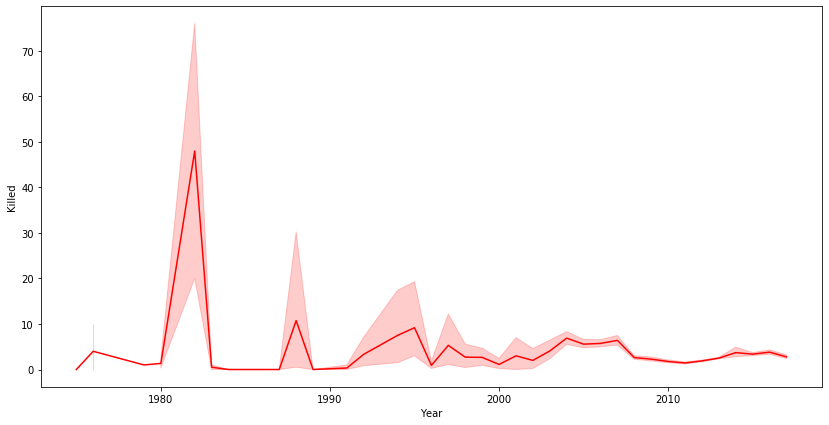

In [35]:
plt.figure(figsize=(14, 7))
sns.lineplot(data = Iraq, x = 'Year', y = 'Killed', color = 'red')

### Number of people killed 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

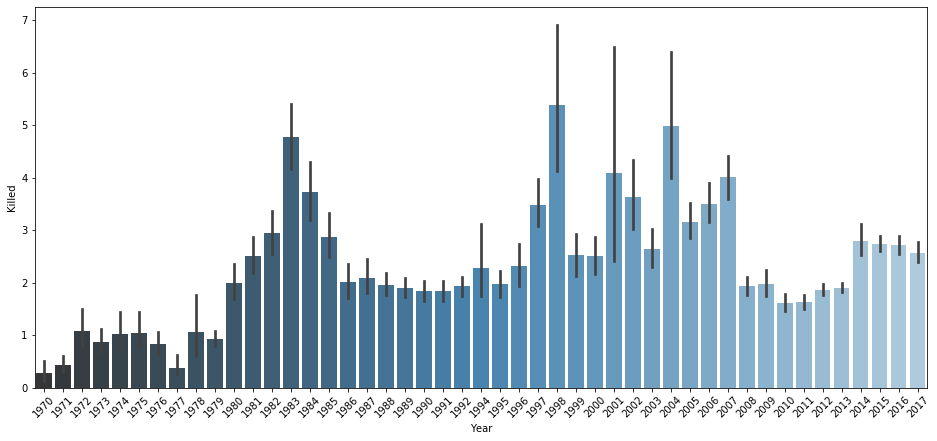

In [36]:
plt.figure(figsize=(16, 7))
sns.barplot(data = df, x = 'Year', y = 'Killed', palette="Blues_d")
plt.xticks(rotation = 45)


## Number of people killed vs Region

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

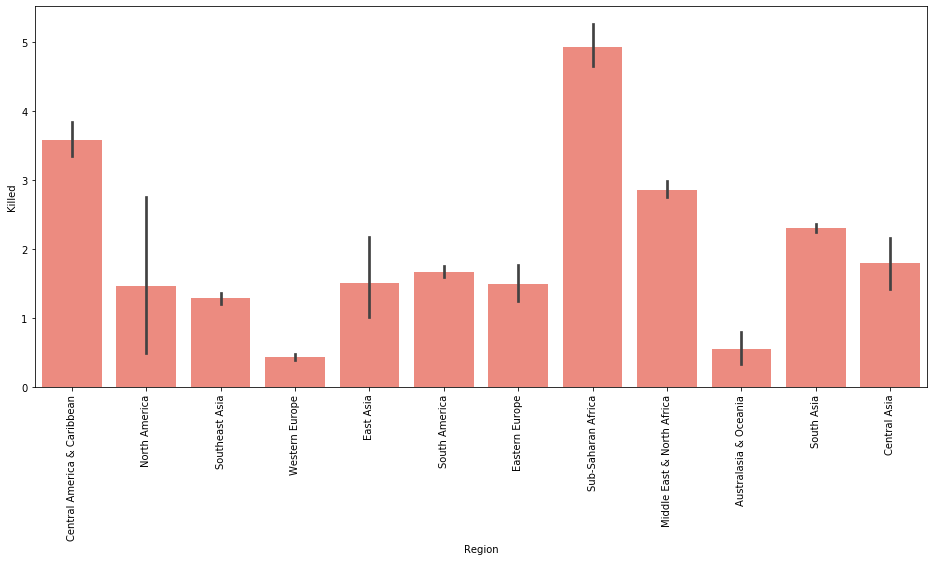

In [37]:
plt.figure(figsize=(16, 7))
sns.barplot(data = df, x = 'Region', y = 'Killed',color="salmon", saturation=.8)
plt.xticks(rotation = 90)


In [39]:
countries_list = list(df['Country'].unique())
countries_list

['Dominican Republic',
 'Mexico',
 'Philippines',
 'Greece',
 'Japan',
 'United States',
 'Uruguay',
 'Italy',
 'East Germany (GDR)',
 'Ethiopia',
 'Guatemala',
 'Venezuela',
 'West Germany (FRG)',
 'Switzerland',
 'Jordan',
 'Spain',
 'Brazil',
 'Egypt',
 'Argentina',
 'Lebanon',
 'Ireland',
 'Turkey',
 'Paraguay',
 'Iran',
 'United Kingdom',
 'Colombia',
 'Bolivia',
 'Nicaragua',
 'Netherlands',
 'Belgium',
 'Canada',
 'Australia',
 'Pakistan',
 'Zambia',
 'Sweden',
 'Costa Rica',
 'South Yemen',
 'Cambodia',
 'Israel',
 'Poland',
 'Taiwan',
 'Panama',
 'Kuwait',
 'West Bank and Gaza Strip',
 'Austria',
 'Czechoslovakia',
 'India',
 'France',
 'South Vietnam',
 'Brunei',
 'Zaire',
 "People's Republic of the Congo",
 'Portugal',
 'Algeria',
 'El Salvador',
 'Thailand',
 'Haiti',
 'Sudan',
 'Morocco',
 'Cyprus',
 'Myanmar',
 'Afghanistan',
 'Peru',
 'Chile',
 'Honduras',
 'Yugoslavia',
 'Ecuador',
 'New Zealand',
 'Malaysia',
 'Singapore',
 'Botswana',
 'Jamaica',
 'Chad',
 'North Yeme

In [40]:
no_of_killed = []
for i in countries_list:
    new_df = df[df['Country']== i]
    no_of_killed.append(sum(new_df['Killed'].dropna()))

In [41]:
no_of_killed

[34.0,
 780.0,
 9559.0,
 325.0,
 66.0,
 3771.0,
 6.0,
 420.0,
 2.0,
 1765.0,
 5167.0,
 227.0,
 97.0,
 74.0,
 133.0,
 1288.0,
 203.0,
 3869.0,
 490.0,
 4061.0,
 117.0,
 6888.0,
 59.0,
 1673.0,
 3410.0,
 14698.0,
 42.0,
 10598.0,
 37.0,
 79.0,
 365.0,
 23.0,
 23822.0,
 70.0,
 22.0,
 17.0,
 0.0,
 543.0,
 1703.0,
 9.0,
 60.0,
 38.0,
 63.0,
 1500.0,
 30.0,
 27.0,
 19341.0,
 534.0,
 81.0,
 0.0,
 324.0,
 15.0,
 32.0,
 11066.0,
 12053.0,
 2742.0,
 336.0,
 3883.0,
 292.0,
 45.0,
 1280.0,
 39384.0,
 12771.0,
 228.0,
 307.0,
 119.0,
 54.0,
 1.0,
 152.0,
 5.0,
 11.0,
 42.0,
 1119.0,
 3.0,
 0,
 15229.0,
 10.0,
 123.0,
 2674.0,
 1948.0,
 78589.0,
 10273.0,
 73.0,
 15530.0,
 220.0,
 1.0,
 22682.0,
 76.0,
 6.0,
 1244.0,
 3043.0,
 43.0,
 672.0,
 274.0,
 1238.0,
 5.0,
 217.0,
 96.0,
 5.0,
 1.0,
 41.0,
 2711.0,
 351.0,
 3065.0,
 79.0,
 46.0,
 6.0,
 2598.0,
 44.0,
 4.0,
 325.0,
 154.0,
 213.0,
 9.0,
 0.0,
 3.0,
 8.0,
 0.0,
 0.0,
 42.0,
 1990.0,
 0.0,
 3.0,
 7.0,
 28.0,
 29.0,
 6.0,
 0.0,
 0.0,
 1.0,
 0,
 

In [42]:
res = dict(zip(countries_list, no_of_killed))
res

{'Dominican Republic': 34.0,
 'Mexico': 780.0,
 'Philippines': 9559.0,
 'Greece': 325.0,
 'Japan': 66.0,
 'United States': 3771.0,
 'Uruguay': 6.0,
 'Italy': 420.0,
 'East Germany (GDR)': 2.0,
 'Ethiopia': 1765.0,
 'Guatemala': 5167.0,
 'Venezuela': 227.0,
 'West Germany (FRG)': 97.0,
 'Switzerland': 74.0,
 'Jordan': 133.0,
 'Spain': 1288.0,
 'Brazil': 203.0,
 'Egypt': 3869.0,
 'Argentina': 490.0,
 'Lebanon': 4061.0,
 'Ireland': 117.0,
 'Turkey': 6888.0,
 'Paraguay': 59.0,
 'Iran': 1673.0,
 'United Kingdom': 3410.0,
 'Colombia': 14698.0,
 'Bolivia': 42.0,
 'Nicaragua': 10598.0,
 'Netherlands': 37.0,
 'Belgium': 79.0,
 'Canada': 365.0,
 'Australia': 23.0,
 'Pakistan': 23822.0,
 'Zambia': 70.0,
 'Sweden': 22.0,
 'Costa Rica': 17.0,
 'South Yemen': 0.0,
 'Cambodia': 543.0,
 'Israel': 1703.0,
 'Poland': 9.0,
 'Taiwan': 60.0,
 'Panama': 38.0,
 'Kuwait': 63.0,
 'West Bank and Gaza Strip': 1500.0,
 'Austria': 30.0,
 'Czechoslovakia': 27.0,
 'India': 19341.0,
 'France': 534.0,
 'South Vietnam'

In [43]:
import operator
sorted_d = sorted(res.items(), key=operator.itemgetter(1), reverse=True)
sorted_d = dict(sorted_d)
sorted_d = dict(list(sorted_d.items())[0: 50]) 
sorted_d

{'Iraq': 78589.0,
 'Afghanistan': 39384.0,
 'Pakistan': 23822.0,
 'Nigeria': 22682.0,
 'India': 19341.0,
 'Sri Lanka': 15530.0,
 'Syria': 15229.0,
 'Colombia': 14698.0,
 'Peru': 12771.0,
 'El Salvador': 12053.0,
 'Algeria': 11066.0,
 'Nicaragua': 10598.0,
 'Somalia': 10273.0,
 'Philippines': 9559.0,
 'Yemen': 8776.0,
 'Turkey': 6888.0,
 'Guatemala': 5167.0,
 'Russia': 4308.0,
 'Burundi': 4205.0,
 'Democratic Republic of the Congo': 4069.0,
 'Lebanon': 4061.0,
 'Sudan': 3883.0,
 'Egypt': 3869.0,
 'United States': 3771.0,
 'United Kingdom': 3410.0,
 'Rwanda': 3236.0,
 'Uganda': 3065.0,
 'Angola': 3043.0,
 'Thailand': 2742.0,
 'Mozambique': 2711.0,
 'South Africa': 2674.0,
 'South Sudan': 2634.0,
 'Libya': 2598.0,
 'Cameroon': 2347.0,
 'Ukraine': 2261.0,
 'Central African Republic': 1990.0,
 'Nepal': 1969.0,
 'Kenya': 1948.0,
 'Ethiopia': 1765.0,
 'Israel': 1703.0,
 'Iran': 1673.0,
 'West Bank and Gaza Strip': 1500.0,
 'Niger': 1474.0,
 'Mali': 1432.0,
 'Spain': 1288.0,
 'Myanmar': 1280.0

## Number of people killed in Countries

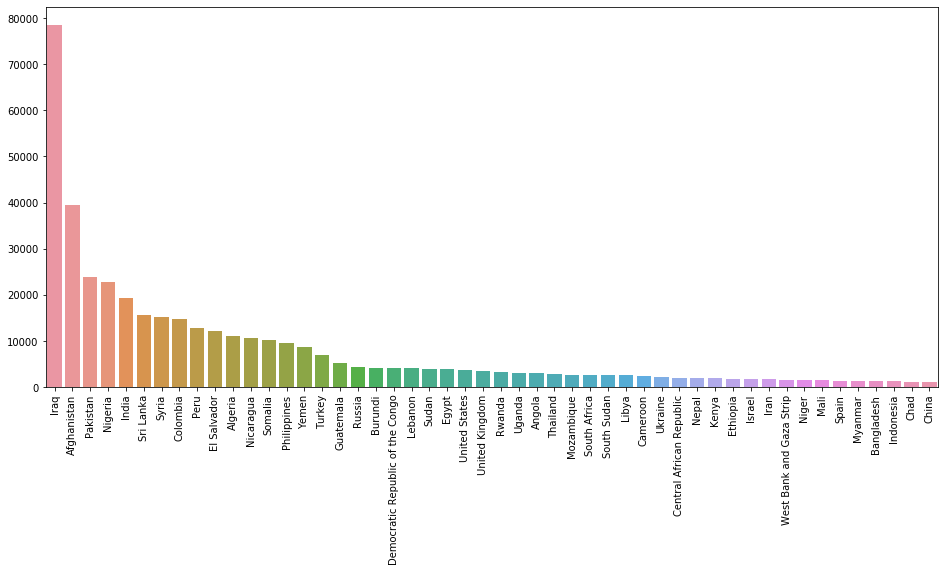

In [44]:
keys = list(sorted_d.keys())
vals = list(sorted_d.values())

plt.figure(figsize=(16, 7))
plt.xticks(rotation = 90)

sns.barplot(x=keys, y=vals)


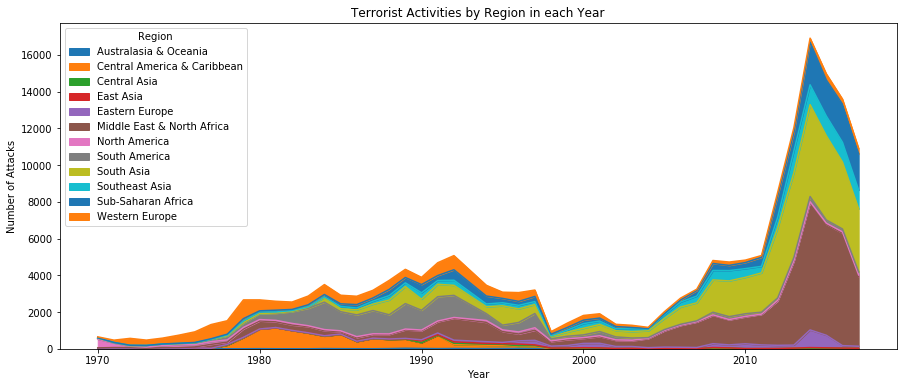

In [45]:

pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

# Conclusion

### 1) Middle East and northern Africa had fatal consequences of terrorism.
### 2) The Middle East and North Africa are worst hitted regions.
### 3) Iraq, Afghanistan and Pakistan are the most damaged countries.